# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
pd.read_csv(url)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 3. Assign it to a variable titanic 

In [3]:
titanic = pd.read_csv(url)

### Step 4. Set PassengerId as the index 

In [4]:
titanic = titanic.set_index('PassengerId')

### Step 5. Create a pie chart presenting the male/female proportion

Text(0.5, 1.0, 'Sex')

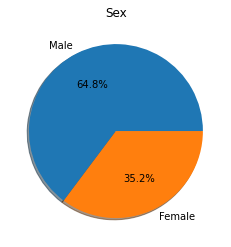

In [5]:
labels = 'Male' , 'Female'
slices = [(titanic['Sex'] == 'male').sum() , (titanic['Sex'] == "female").sum()]
plt.pie(slices, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title("Sex")

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

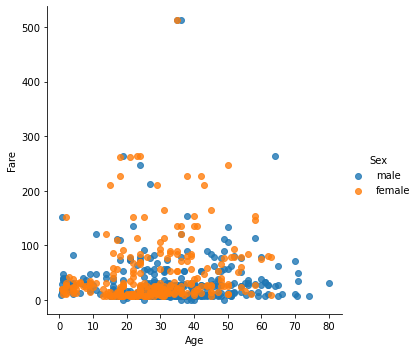

In [6]:
sns.lmplot('Age', 'Fare', titanic, hue = 'Sex', fit_reg=False)

### Step 7. How many people survived?

In [7]:
titanic['Survived'].sum()

342

### Step 8. Create a histogram with the Fare payed

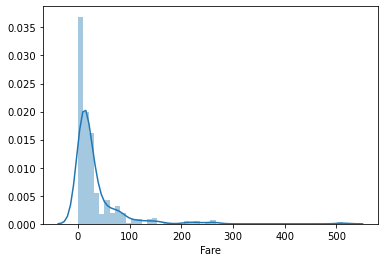

In [9]:
#Nesse step, primeiro fiz usando o Seaborn encontrando o gráfico abaixo
sns.distplot(titanic['Fare'])

In [11]:
#Aqui resolvi tentar usando o outro método, baseado um pouco no gráfico acima.
#Com o Seaborn seaborn usa menos linhas pra desenvolver o gráfico
#Mas percebi que o eixo que mostra a frêquencia que aparece fica com valores diferentes, como se fosse dividido por 10000
#Por que isso acontece?
fare = titanic['Fare'].sort_values(ascending = False)
x = np.arange(0,600,10)

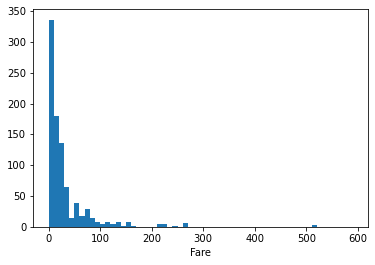

In [12]:
y = plt.hist(fare , bins = x)
y = plt.xlabel('Fare')

### BONUS: Create your own question and answer it.

Nesse caso, eu decidi fazer uma relação entre a classe, a idade e o sexo da pessoa. Construi dois gráficos que possuem a mesma relação, mas podendo ser vista de formas diferentes. Com eles a gente pode ver que na primeira classe se concentra pessoas com cerca de 40 anos, enquanto nas classes mais abaixo as idades que concentra a maior quantidade diminuem.
Pelo gráfico também é possível er que o sexo não interfere, significativamente, nesse caso.

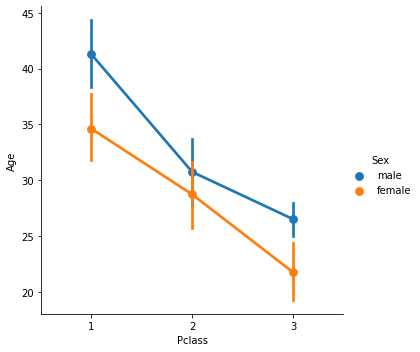

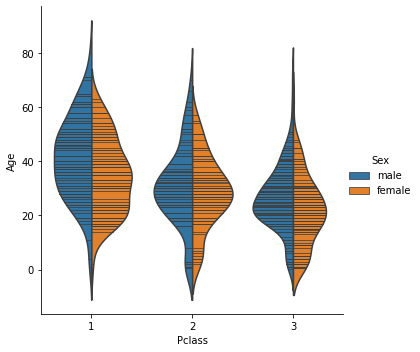

In [20]:
ax1 = sns.catplot('Pclass', 'Age', hue = "Sex", kind="point", data=titanic)
ax2 = sns.catplot('Pclass', 'Age', hue="Sex", kind="violin", inner="stick", split=True, data=titanic)

Nesse outro caso, fiz uma relação entre a classe e a taxa de sobrevivência que cai conforme a classe também cai, ou seja:
    Taxa de sobrevivência na primeira classe > Taxa de sobrevivência na primeira classe

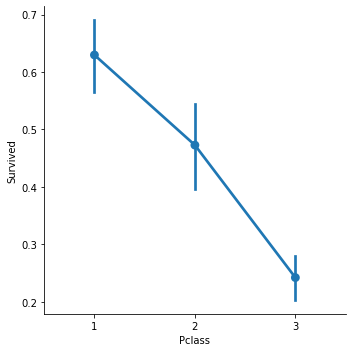

In [24]:
ax3 = sns.catplot('Pclass', 'Survived', kind="point", data=titanic)